<a href="https://colab.research.google.com/github/Chyreen/Using-NLP-and-machine-learning-techniques-to-identify-undervalued-football-players/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is without TD-IDF, poly nor pca

In [ ]:
import pandas as pd
import numpy as np
flat_nlp_df = pd.read_csv('/content/drive/MyDrive/Project_excel_files/flat_result.csv')
flat_nlp_df.drop(columns = ['Unnamed: 0'], inplace = True)
flat_nlp_df.head()

,player_name,sentiment_score,player_sentence,date
0,Rashford,1,['Gran in crash with Marcus Rashford had no id...,2023-09-25 15:58:13
1,Kalvin Phillips,4,"[""Kalvin Phillips says Kalvin Phillips is actu...",2023-09-25 20:09:39
2,Billy Gilmour,4,"[""'We knew' - Billy Gilmour makes Kaoru Mitoma...",2023-09-25 19:48:07
3,Kaoru Mitoma,4,"[""'We knew' - Billy Gilmour makes Kaoru Mitoma...",2023-09-25 19:48:07
4,Roberto De,4,"[""'We knew' - Billy Gilmour makes Kaoru Mitoma...",2023-09-25 19:48:07


In [ ]:
flat_nlp_df_with_tfidf = flat_nlp_df[['player_name', 'sentiment_score', 'date']]

### Load all the CSV files

In [ ]:
flat_nlp_df_with_tfidf['date'] = pd.to_datetime(flat_nlp_df_with_tfidf['date'])
flat_nlp_df_with_tfidf['date'] = flat_nlp_df_with_tfidf['date'].dt.date
flat_nlp_df_with_tfidf.head()

<ipython-input-3-76e10f397d30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_nlp_df_with_tfidf['date'] = pd.to_datetime(flat_nlp_df_with_tfidf['date'])
<ipython-input-3-76e10f397d30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_nlp_df_with_tfidf['date'] = flat_nlp_df_with_tfidf['date'].dt.date


,player_name,sentiment_score,date
0,Rashford,1,2023-09-25
1,Kalvin Phillips,4,2023-09-25
2,Billy Gilmour,4,2023-09-25
3,Kaoru Mitoma,4,2023-09-25
4,Roberto De,4,2023-09-25


In [ ]:
len(flat_nlp_df_with_tfidf)

29423

In [ ]:
import pandas as pd
import datetime as datetime

In [ ]:
player_detail = pd.read_csv('/content/drive/MyDrive/Project_excel_files/player_detail.csv')

In [ ]:
player_detail = player_detail[['Name','player_id','Position', 'Height (m)', 'Nationality', 'Foot']]

In [ ]:
player_market_value = pd.read_csv('/content/drive/MyDrive/Project_excel_files/tm_player_market_value_development.csv')
player_market_value['datum_mw'] = pd.to_datetime(player_market_value['datum_mw'])
player_market_value.drop(columns = ['highest_date', 'last_change', ], axis = 1, inplace = True)
player_market_value['%_chg'] = player_market_value.groupby('player_id')['mw'].pct_change() * 100
player_market_value.head()

,mw,datum_mw,verein,age,player_id,Highest market value,%_chg
0,50000.0,2009-05-27,KRC Genk U19,17,108390,75000000.0,NaN
1,150000.0,2010-07-28,KRC Genk,18,108390,75000000.0,200.000000
2,1000000.0,2010-10-06,KRC Genk,18,108390,75000000.0,566.666667
3,2000000.0,2010-12-28,KRC Genk,18,108390,75000000.0,100.000000
4,3000000.0,2011-05-24,KRC Genk,19,108390,75000000.0,50.000000


In [ ]:
player_market_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280334 entries, 0 to 280333
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   mw                    280334 non-null  float64       
 1   datum_mw              280334 non-null  datetime64[ns]
 2   verein                280334 non-null  object        
 3   age                   280334 non-null  int64         
 4   player_id             280334 non-null  int64         
 5   Highest market value  280334 non-null  float64       
 6   %_chg                 260328 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 15.0+ MB


In [ ]:
player_transfer_history = pd.read_csv('/content/drive/MyDrive/Project_excel_files/tm_player_transfer_history.csv')
player_transfer_history['date'] = pd.to_datetime(player_transfer_history['date'])
player_transfer_history = player_transfer_history.dropna(subset=['date'])
median_transfer_fee = player_transfer_history['Transfer Fee'].median()
player_transfer_history['Transfer Fee'].fillna(median_transfer_fee, inplace=True) #to fill up NaN
player_transfer_history = player_transfer_history.sort_values(by=['player_id', 'date'], ascending=[True, True])
player_transfer_history.drop(columns = ['url', 'season', 'Total transfer fees','futureTransfer', 'upcoming', 'from_longitude', 'from_latitude', 'to_longitude', 'to_latitude', 'dateUnformatted', 'fee','marketValue'], axis = 1, inplace = True)
player_transfer_history.head()

,from_clubName,to_clubName,date,player_id,TM Market Value,Transfer Type,Transfer Fee
101276,Olimpia U19,Olimpia,1998-07-01,215,0.0,Transfer,0.0
101275,Olimpia,Bayern Munich,1999-07-01,215,0.0,Transfer,5000000.0
101274,Bayern Munich,Blackburn,2007-07-28,215,3000000.0,Transfer,5000000.0
101273,Blackburn,Man City,2009-07-01,215,10000000.0,Transfer,21200000.0
101272,Man City,Blackburn,2011-01-14,215,7000000.0,Loan,0.0


In [ ]:
player_transfer_history.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151412 entries, 101276 to 138910
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   from_clubName    151412 non-null  object        
 1   to_clubName      151412 non-null  object        
 2   date             151412 non-null  datetime64[ns]
 3   player_id        151412 non-null  int64         
 4   TM Market Value  151412 non-null  float64       
 5   Transfer Type    151412 non-null  object        
 6   Transfer Fee     151412 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 9.2+ MB


In [ ]:
first = pd.merge(player_detail, player_market_value, on='player_id')
full = pd.merge(first, player_transfer_history, on= ['player_id'])
len(full)

2528768

In [ ]:
# Sort both dataframes by date
first = pd.merge(player_detail, player_market_value, on='player_id')
first = first.sort_values('datum_mw')
player_transfer_history = player_transfer_history.sort_values('date')

full = pd.merge_asof(
    first,
    player_transfer_history,
    by='player_id',
    left_on='datum_mw',     # date from the player market value
    right_on='date',    # date from the transfer history
    direction= 'backward'  # search for nearest earlier market value date
)

In [ ]:
full.rename(columns={'date': 'date_market'}, inplace=True)
flat_nlp_df_with_tfidf.rename(columns={'date': 'date_news'}, inplace=True)
flat_nlp_df_with_tfidf['date_news'] = pd.to_datetime(flat_nlp_df_with_tfidf['date_news'], errors='coerce')
full.rename(columns={'Name': 'player_name'}, inplace=True)

<ipython-input-14-9dbc8087235d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_nlp_df_with_tfidf.rename(columns={'date': 'date_news'}, inplace=True)
<ipython-input-14-9dbc8087235d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_nlp_df_with_tfidf['date_news'] = pd.to_datetime(flat_nlp_df_with_tfidf['date_news'], errors='coerce')


In [ ]:
news_df = flat_nlp_df_with_tfidf.sort_values('date_news')
market_df = full.sort_values('datum_mw')
news_df['date_news'] = pd.to_datetime(news_df['date_news'])

merged_df = pd.merge_asof(
    news_df,
    market_df,
    by='player_name',
    left_on='date_news',    #  date from the news data
    right_on='datum_mw',    #  date from the quantitive data
    direction= 'backward',  # search for nearest earlier market value date
    suffixes=('_news', '_market')
)

In [ ]:
merged_df['month'] = merged_df['date_news'].dt.month
merged_df['year'] = merged_df['date_news'].dt.year
merged_df['month_year'] = merged_df['year'].astype(str) + '_' + merged_df['month'].astype(str)

In [ ]:
# Drop rows with any null values
merged_df = merged_df.dropna()

In [ ]:
# Remove all duplicate rows
merged_df = merged_df.drop_duplicates()

In [ ]:
len(merged_df)

5915

Comparative Analysis

In [ ]:
score1 = merged_df[merged_df['sentiment_score'] == 1]
score2 = merged_df[merged_df['sentiment_score'] == 2]
score3 = merged_df[merged_df['sentiment_score'] == 3]
score4 = merged_df[merged_df['sentiment_score'] == 4]
score5 = merged_df[merged_df['sentiment_score'] == 5]

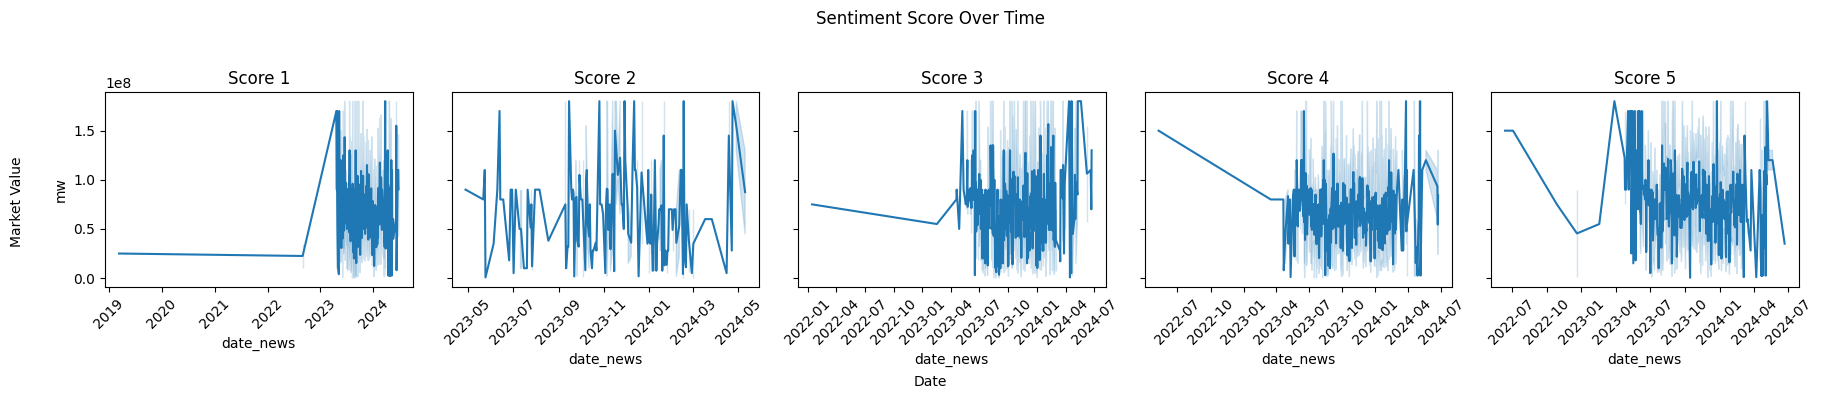

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

# Plot each dataset on a separate subplot
sns.lineplot(x='date_news', y='mw', data=score1, ax=axes[0])
axes[0].set_title('Score 1')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(x='date_news', y='mw', data=score2, ax=axes[1])
axes[1].set_title('Score 2')
axes[1].tick_params(axis='x', rotation=45)

sns.lineplot(x='date_news', y='mw', data=score3, ax=axes[2])
axes[2].set_title('Score 3')
axes[2].tick_params(axis='x', rotation=45)

sns.lineplot(x='date_news', y='mw', data=score4, ax=axes[3])
axes[3].set_title('Score 4')
axes[3].tick_params(axis='x', rotation=45)

sns.lineplot(x='date_news', y='mw', data=score5, ax=axes[4])
axes[4].set_title('Score 5')
axes[4].tick_params(axis='x', rotation=45)

# Set common labels and title
fig.suptitle('Sentiment Score Over Time')
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Market Value', va='center', rotation='vertical')

# Adjust layout to make room for labels
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()

In [ ]:
Transfer = merged_df[merged_df['Transfer Type'] == 'Transfer']
Loan = merged_df[merged_df['Transfer Type'] == 'Loan']
end_of_loan = merged_df[merged_df['Transfer Type'] == 'End of Loan']

<ipython-input-23-cbb66cf1e80e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transfer['mw_smooth'] = Transfer['mw'].rolling(window=window_size).mean()
<ipython-input-23-cbb66cf1e80e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transfer['sentiment_score_smooth'] = Transfer['sentiment_score'].rolling(window=window_size).mean()
<ipython-input-23-cbb66cf1e80e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

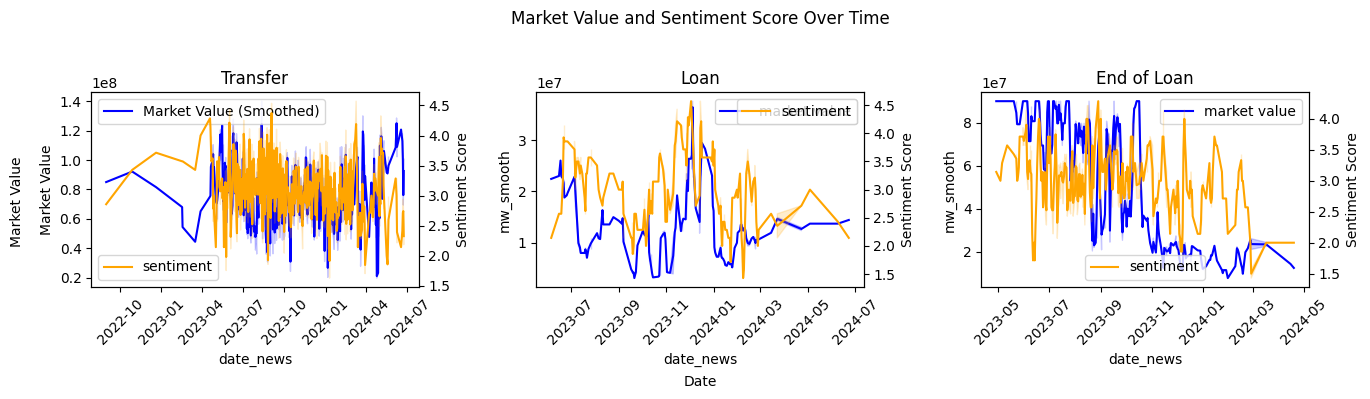

In [ ]:
# window size for the rolling average
window_size = 7

# Apply the rolling average to each dataset
Transfer['mw_smooth'] = Transfer['mw'].rolling(window=window_size).mean()
Transfer['sentiment_score_smooth'] = Transfer['sentiment_score'].rolling(window=window_size).mean()

Loan['mw_smooth'] = Loan['mw'].rolling(window=window_size).mean()
Loan['sentiment_score_smooth'] = Loan['sentiment_score'].rolling(window=window_size).mean()

end_of_loan['mw_smooth'] = end_of_loan['mw'].rolling(window=window_size).mean()
end_of_loan['sentiment_score_smooth'] = end_of_loan['sentiment_score'].rolling(window=window_size).mean()

# Create a figure and a set of subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

# Plot each dataset on a separate subplot with dual y-axes and rolling average applied

# Plot for Transfer
sns.lineplot(x='date_news', y='mw_smooth', data=Transfer, ax=axes[0], color='b', label='Market Value (Smoothed)')
axes[0].set_title('Transfer')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Market Value')

# Create second y-axis for sentiment score
ax2_0 = axes[0].twinx()
sns.lineplot(x='date_news', y='sentiment_score_smooth', data=Transfer, ax=ax2_0, color='orange', label='sentiment')
ax2_0.set_ylabel('Sentiment Score')

# Plot for Loan
sns.lineplot(x='date_news', y='mw_smooth', data=Loan, ax=axes[1], color='b', label='market value')
axes[1].set_title('Loan')
axes[1].tick_params(axis='x', rotation=45)

# Create second y-axis for sentiment score
ax2_1 = axes[1].twinx()
sns.lineplot(x='date_news', y='sentiment_score_smooth', data=Loan, ax=ax2_1, color='orange', label='sentiment')
ax2_1.set_ylabel('Sentiment Score')

# Plot for End of Loan
sns.lineplot(x='date_news', y='mw_smooth', data=end_of_loan, ax=axes[2], color='b', label='market value')
axes[2].set_title('End of Loan')
axes[2].tick_params(axis='x', rotation=45)

# Create second y-axis for sentiment score
ax2_2 = axes[2].twinx()
sns.lineplot(x='date_news', y='sentiment_score_smooth', data=end_of_loan, ax=ax2_2, color='orange', label='sentiment')
ax2_2.set_ylabel('Sentiment Score')

# Set common labels and title
fig.suptitle('Market Value and Sentiment Score Over Time')
fig.text(0.5, 0.04, 'Date', ha='center')
fig.text(0.04, 0.5, 'Market Value', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()


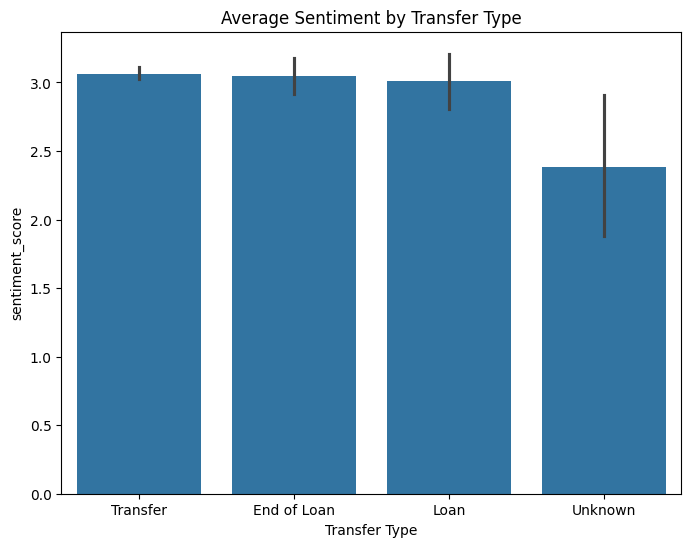

In [ ]:
# Bar Plot: Average Sentiment by Transfer Type
plt.figure(figsize=(8, 6))
sns.barplot(x='Transfer Type', y='sentiment_score', data=merged_df)
plt.title('Average Sentiment by Transfer Type')
plt.show()

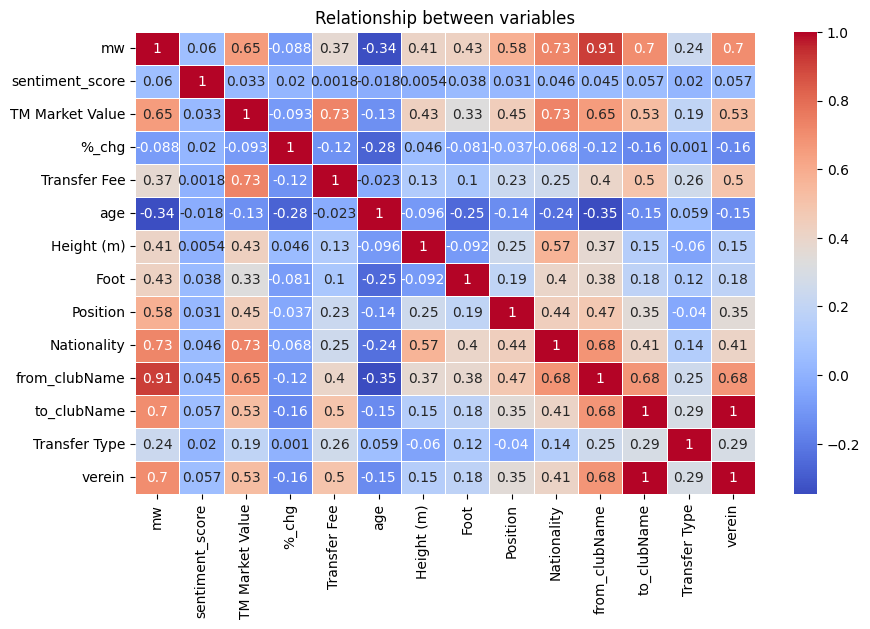

In [ ]:
# encoding function
def target_encode(data, categorical_col, target_col):
    # to calculate the mean of the target for each category
    means = data.groupby(categorical_col)[target_col].mean()
    # mapping the mean back to the initial column
    data[f'{categorical_col}'] = data[categorical_col].map(means)
    return data

# datatype objects to encode
categorical_feat = ['Foot', 'Position', 'Nationality', 'from_clubName', 'to_clubName', 'Transfer Type', 'verein']

target_variable = 'mw'
# using a for loop to target encode each categorical variable
for col in categorical_feat:
    m = target_encode(merged_df, col, target_variable)

numeric_cols = ['mw','sentiment_score', 'TM Market Value', '%_chg', 'Transfer Fee', 'age', 'Height (m)'] + \
               [f'{col}' for col in categorical_feat]

corr = m[numeric_cols].corr()

# heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Relationship between variables')
plt.show()


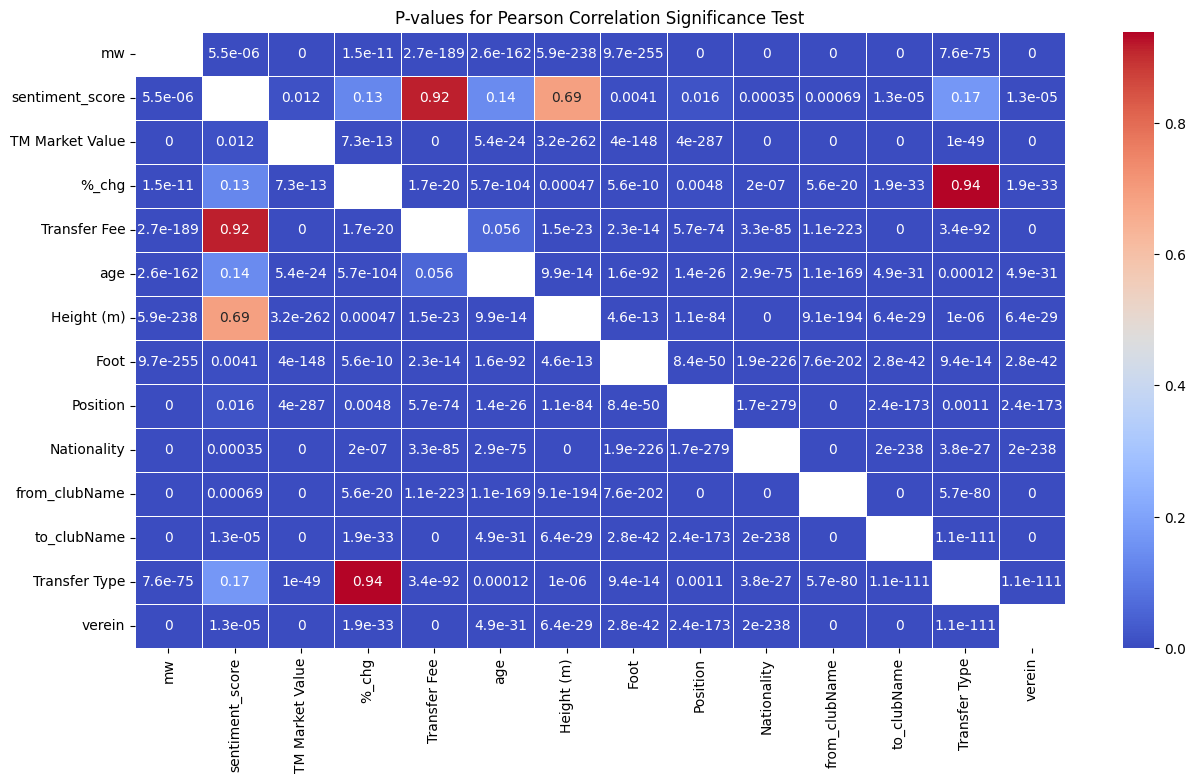

Significance level where 1 implies significant and 0 implies not significant)


,mw,sentiment_score,TM Market Value,%_chg,Transfer Fee,age,Height (m),Foot,Position,Nationality,from_clubName,to_clubName,Transfer Type,verein
mw,0,1,1,1,1,1,1,1,1,1,1,1,1,1
sentiment_score,1,0,1,0,0,0,0,1,1,1,1,1,0,1
TM Market Value,1,1,0,1,1,1,1,1,1,1,1,1,1,1
%_chg,1,0,1,0,1,1,1,1,1,1,1,1,0,1
Transfer Fee,1,0,1,1,0,0,1,1,1,1,1,1,1,1
age,1,0,1,1,0,0,1,1,1,1,1,1,1,1
Height (m),1,0,1,1,1,1,0,1,1,1,1,1,1,1
Foot,1,1,1,1,1,1,1,0,1,1,1,1,1,1
Position,1,1,1,1,1,1,1,1,0,1,1,1,1,1
Nationality,1,1,1,1,1,1,1,1,1,0,1,1,1,1


In [ ]:
from scipy.stats import pearsonr
# eliminate rows with NaN or infinite values in the numeric columns
merged_df_clean = merged_df[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()

p_values = pd.DataFrame(np.zeros((len(numeric_cols), len(numeric_cols))), columns=numeric_cols, index=numeric_cols)

for col1 in numeric_cols:
    for col2 in numeric_cols:
      # to avoid self correlation
        if col1 != col2:
            corr_val, p_val = pearsonr(merged_df_clean[col1], merged_df_clean[col2])
            p_values.loc[col1, col2] = p_val
        else:
            p_values.loc[col1, col2] = np.nan

# p-values heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(p_values, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('P-values for Pearson Correlation Significance Test')
plt.show()

# at 95% confidence level
significant_corr = (p_values < 0.05).astype(int)
print("Significance level where 1 implies significant and 0 implies not significant)")
significant_corr

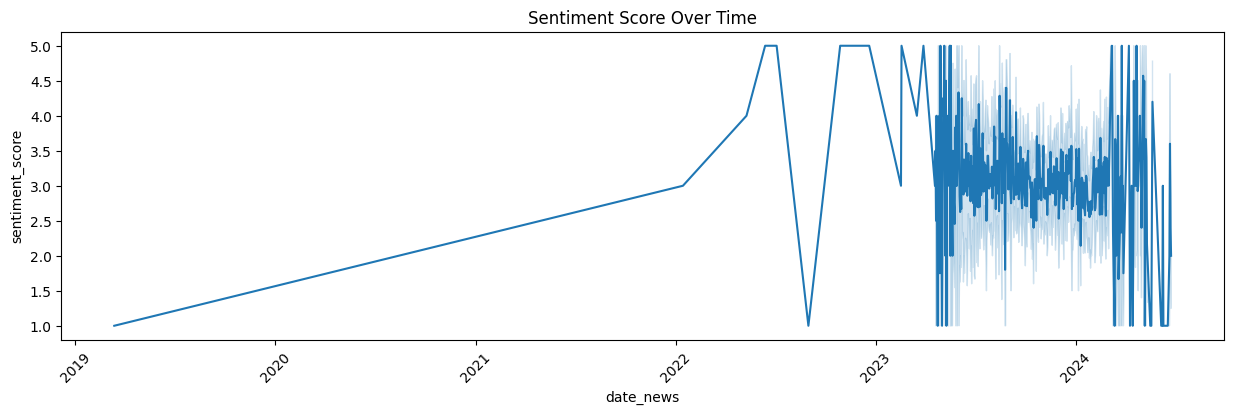

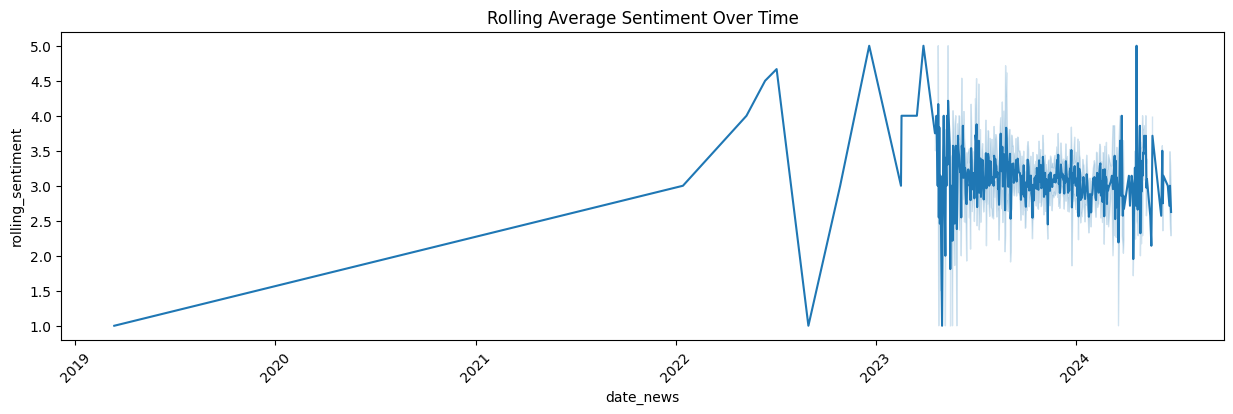

In [ ]:
# Line Plot: Sentiment Score Over Time for each player
plt.figure(figsize=(15, 4))
sns.lineplot(x='date_news', y='sentiment_score',  data=merged_df)
plt.title('Sentiment Score Over Time')
plt.xticks(rotation=45)
plt.show()

# Rolling Mean Plot (7-day window)
merged_df['rolling_sentiment'] = merged_df.groupby('player_name')['sentiment_score'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
plt.figure(figsize=(15, 4))
sns.lineplot(x='date_news', y='rolling_sentiment', data=merged_df)
plt.title('Rolling Average Sentiment Over Time')
plt.xticks(rotation=45)
plt.show()

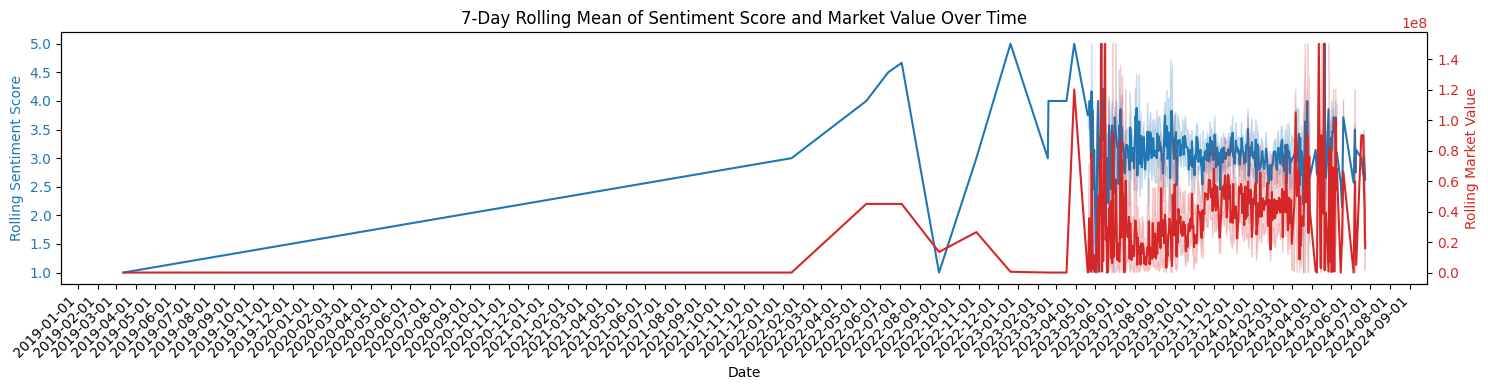

In [ ]:
import matplotlib.dates as mdates

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(15, 4))

# Plot rolling sentiment
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Sentiment Score', color='tab:blue')
sns.lineplot(x='date_news', y='rolling_sentiment', data=merged_df, ax=ax1, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Format x-axis dates for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Correct date format
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))     # Show every month
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')         # Rotate x-axis labels for clarity

# Create a second y-axis for rolling market value
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Market Value', color='tab:red')
merged_df['rolling_market_value'] = merged_df.groupby('player_name')['TM Market Value'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
sns.lineplot(x='date_news', y='rolling_market_value', data=merged_df, ax=ax2, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and adjust layout
plt.title('7-Day Rolling Mean of Sentiment Score and Market Value Over Time')
plt.tight_layout()  # Prevents label clipping
plt.show()

## Machine learning

Further transformatiom

In [ ]:
# Filter out negative values if any
merged_df = merged_df.dropna(subset=['%_chg'])

In [ ]:
merged_df = merged_df[merged_df['mw'] != 0]
merged_df.head()

,player_name,sentiment_score,date_news,player_id,Position,Height (m),Nationality,Foot,mw,datum_mw,...,to_clubName,date_market,TM Market Value,Transfer Type,Transfer Fee,month,year,month_year,rolling_sentiment,rolling_market_value
1,Phil Foden,1,2019-03-13,406635.0,6.394016e+07,1.71,6.527732e+07,1.036441e+08,25000000.0,2019-03-05,...,1.018078e+08,2017-07-01,0.0,7.254410e+07,0.0,3,2019,2019_3,1.000000,0.0
4,Declan Rice,3,2022-01-14,357662.0,5.347130e+07,1.88,6.527732e+07,5.558380e+07,75000000.0,2021-12-23,...,8.148889e+07,2017-07-01,0.0,7.254410e+07,0.0,1,2022,2022_1,3.000000,0.0
7,Erling Haaland,4,2022-05-10,418560.0,1.118693e+08,1.95,1.773926e+08,1.036441e+08,150000000.0,2021-12-22,...,1.204000e+08,2020-01-01,45000000.0,7.254410e+07,20000000.0,5,2022,2022_5,4.000000,45000000.0
8,Erling Haaland,5,2022-06-13,418560.0,1.118693e+08,1.95,1.773926e+08,1.036441e+08,150000000.0,2022-06-09,...,1.204000e+08,2020-01-01,45000000.0,7.254410e+07,20000000.0,6,2022,2022_6,4.500000,45000000.0
9,Erling Haaland,5,2022-07-04,418560.0,1.118693e+08,1.95,1.773926e+08,1.036441e+08,150000000.0,2022-06-09,...,1.204000e+08,2020-01-01,45000000.0,7.254410e+07,20000000.0,7,2022,2022_7,4.666667,45000000.0


In [ ]:
columns_to_transform = ['sentiment_score', 'TM Market Value', 'age', 'Transfer Fee', 'rolling_market_value', 'rolling_sentiment', 'mw', 'Height (m)']
for col in columns_to_transform:
    merged_df[col] = np.log1p(merged_df[col])

In [ ]:
y = merged_df['mw']

In [ ]:
X = merged_df.drop(columns=['mw', 'player_id', 'date_news', 'date_market', 'datum_mw'])
player_names = X['player_name'].copy()
X.drop(columns=['player_name'], inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("te", TargetEncoder())
])
# preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
test_idx = X_test.index

# y log transformation
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# inverse frequency weights based on y_train values
y_train_w = pd.DataFrame(y_train_log, columns=['y_train_log'])
y_train_counts = y_train_w['y_train_log'].value_counts()
weights = 1 / y_train_counts.reindex(y_train_w['y_train_log']).values

In [ ]:
# model instantiation
model = RandomForestRegressor(random_state=0)

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

# to handle infinite values of float64
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.max(), inplace=True)

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_test.max(), inplace=True)

# parameter grid for hyperparameterization
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_features': ['sqrt','log2', None],
    'model__max_depth': [None, 7, 17],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [3, 5],
    'model__bootstrap': [True, False]
}

# gridSearchCV
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train_log, model__sample_weight=weights)

# best model from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"best model: {best_params}")

# predictions with the best model
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# calculate metrics on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

Best parameters: {'model__bootstrap': False, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Mean Squared Error: 0.01239672955573586
Mean Absolute Error: 0.042115536191489715
Root Mean Squared Error: 0.1113406015599694
R^2 Score: 0.9928095091070492


In [ ]:
# matching indices to player names
X_test_with_names = X_test.copy()
X_test_with_names['player_name'] = player_names.loc[test_idx].values

# Creating a DataFrame to compare predicted and actual values with player names
results_df = pd.DataFrame({
    'player_name': X_test_with_names['player_name'],
    'predicted_market_value': y_pred,
    'actual_market_value': y_test.flatten()
})

# Calculate the difference between predicted and actual values
results_df['undervaluation'] = results_df['predicted_market_value'] - results_df['actual_market_value']
results_df.head()

,player_name,predicted_market_value,actual_market_value,undervaluation
2869,Erling Haaland,19.002791,19.008467,-0.005677
16786,Marcus Rashford,18.122251,18.132999,-0.010747
28514,Kalvin Phillips,17.137050,17.147715,-0.010665
9631,Rodri,18.396480,18.420681,-0.024201
1469,Bruno Fernandes,18.083939,18.132999,-0.049059


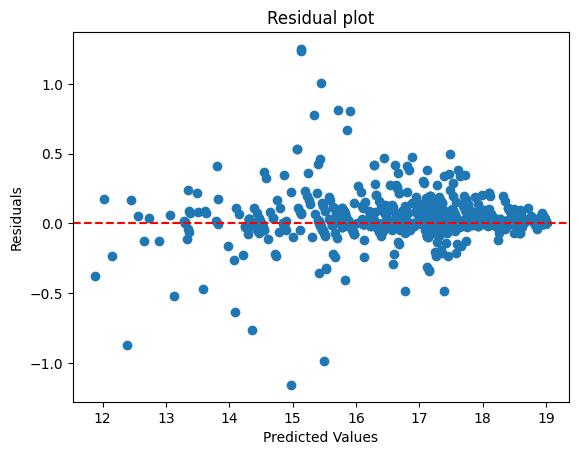

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

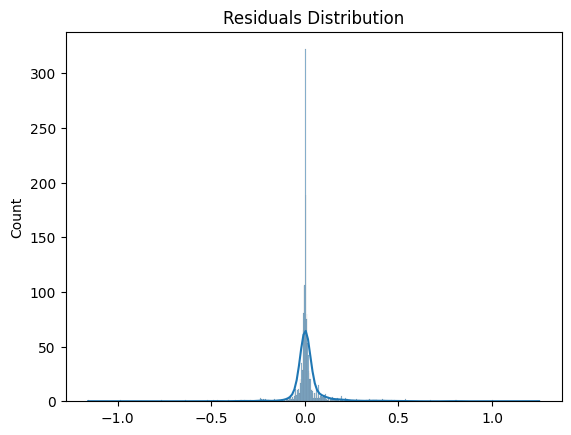

In [ ]:
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

Gradient boosted tree

In [ ]:
model = GradientBoostingRegressor(random_state=0)

# Create the full pipeline with preprocessing and the model
model_pipeline = Pipeline(steps=[('model', model)])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_features': ['sqrt', 'log2', None],
    'model__max_depth': [None, 7, 17],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [3, 5],
    'model__learning_rate': [0.001, 0.01]
}

# Set up the GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search on the training data with sample weights
grid_search.fit(pred_pca_train, y_train_log, model__sample_weight=weights)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

# Make predictions with the best model
y_pred_log = best_model.predict(pred_pca_test)
y_pred = np.expm1(y_pred_log)  # Inverse log to get back the original scale

# Calculate metrics on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Best Hyperparameters: {'model__learning_rate': 0.01, 'model__max_depth': 17, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Mean Squared Error: 0.27926004878408506
Mean Absolute Error: 0.42698768683714156
Root Mean Squared Error: 0.5284506114899339
R^2 Score: 0.8380204368806412


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

# Create the full pipeline with preprocessing and the model
model_pipeline = Pipeline(steps=[('model', model)])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]  # Power parameter for the Minkowski metric
}

# Set up the GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search on the training data with sample weights
grid_search.fit(pred_pca_train, y_train_log)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

# Make predictions with the best model
y_pred_log = best_model.predict(pred_pca_test)
y_pred = np.expm1(y_pred_log)  # Inverse log to get back the original scale

# Calculate metrics on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Best Hyperparameters: {'model__n_neighbors': 7, 'model__p': 1, 'model__weights': 'distance'}
Mean Squared Error: 0.12812059044345822
Mean Absolute Error: 0.1317375954278973
Root Mean Squared Error: 0.3579393669931518
R^2 Score: 0.9256860501278822


In [ ]:
model = AdaBoostRegressor()

# Create the full pipeline with preprocessing and the model
model_pipeline = Pipeline(steps=[('model', model)])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 1.0],
    'model__loss': ['linear', 'square', 'exponential']
}

# Set up the GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search on the training data with sample weights
grid_search.fit(pred_pca_train, y_train_log)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

# Make predictions with the best model
y_pred_log = best_model.predict(pred_pca_test)
y_pred = np.expm1(y_pred_log)  # Inverse log to get back the original scale

# Calculate metrics on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'model__learning_rate': 0.1, 'model__loss': 'exponential', 'model__n_estimators': 50}
Mean Squared Error: 0.5375979711352253
Mean Absolute Error: 0.5636378069995699
Root Mean Squared Error: 0.7332107276460331
R^2 Score: 0.6881763615043093


In [ ]:
model = SVR()

# Create the full pipeline with preprocessing and the SVR model
model_pipeline = Pipeline(steps=[('model', model)])

# Define the parameter grid for hyperparameter tuning for SVR
param_grid = {
    'model__C': [0.001, 0.1, 1, 10],
    'model__epsilon': [0.01, 0.1, 0.2, 0.5],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': [0.001, 0.01, 0.1]
}

# Set up the GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the grid search on the training data with sample weights (if applicable)
grid_search.fit(pred_pca_train, y_train_log)

# Get the best model from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

# Make predictions with the best model
y_pred_log = best_model.predict(pred_pca_test)
y_pred = np.expm1(y_pred_log)  # Inverse log to get back the original scale

# Calculate metrics on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

## Shapley

In [ ]:
!pip install --upgrade shap
!pip install --upgrade scikit-learn
import shap
shap.initjs()

In [ ]:
bestRFModel = RandomForestRegressor(bootstrap = False, max_depth = None, max_features = 'sqrt', min_samples_leaf = 3, n_estimators = 100, min_samples_split = 2)
bestRFModel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=3)

In [ ]:
import shap

# Create a SHAP explainer for tree-based models like Random Forest
explainer = shap.TreeExplainer(best_model.named_steps['model'])

# Generate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP values summary
shap.summary_plot(shap_values, X_test, plot_type="bar", color='blue')

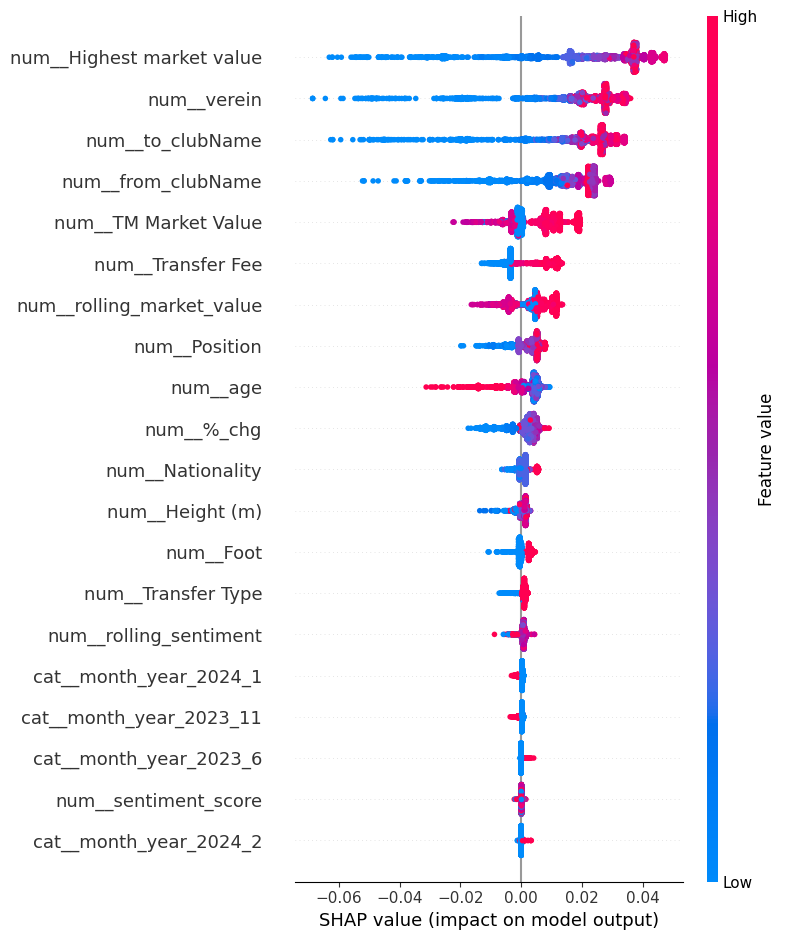

In [ ]:
import shap

# Initialize the JavaScript visualization in Jupyter
shap.initjs()

# Create a SHAP explainer for the RandomForest model within the pipeline
explainer = shap.TreeExplainer(best_model.named_steps['model'])

# Generate SHAP values for the training data
shap_values = explainer.shap_values(best_model.named_steps['preprocessor'].transform(X_train))

# Now you can visualize SHAP values
shap.summary_plot(shap_values, best_model.named_steps['preprocessor'].transform(X_train), feature_names=best_model.named_steps['preprocessor'].get_feature_names_out())


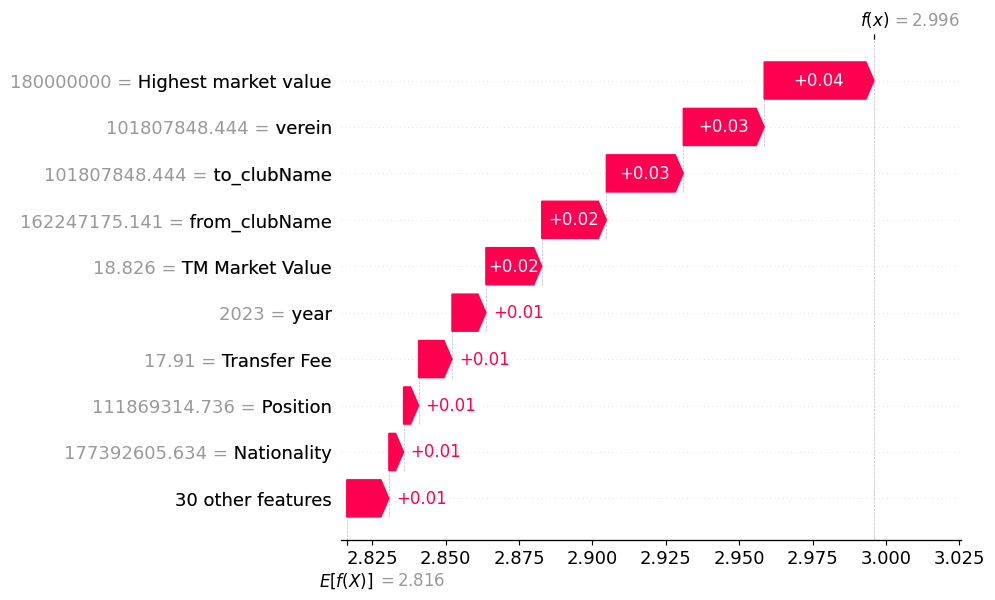

In [ ]:
# SHAP values for the training data
shap_values = explainer.shap_values(best_model.named_steps['preprocessor'].transform(X_test))
shap.waterfall_plot(shap.Explanation(values=shap_values[0],
                                     base_values=explainer.expected_value,
                                     data=X_test.iloc[0]))

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(best_model.named_steps['preprocessor'].transform(X_test))
shap.force_plot(explainer.expected_value, shap_values[1], X_test.iloc[1])